<a href="https://colab.research.google.com/github/PalakDograCSE-AI2004/CVDL_Summer_Internship/blob/main/SimpleAutoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#here after using simple or standard autoencoders we will get the same image as output as we pass the input.the accuracy ie pixels and
#clarity of output image will be more when we train the model at 100 or more epoch.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torchvision
import torch


In [ ]:
transforms = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.5,), (0.5))
])

train_data = torchvision.datasets.MNIST('dataset/train', train=True,
                                        transform = transforms,
                                        download=True)

test_data = torchvision.datasets.MNIST('dataset/test', train=False,
                                        transform = transforms,
                                        download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 107958856.23it/s]


Extracting dataset/train/MNIST/raw/train-images-idx3-ubyte.gz to dataset/train/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 39329770.72it/s]

Extracting dataset/train/MNIST/raw/train-labels-idx1-ubyte.gz to dataset/train/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 26673858.73it/s]


Extracting dataset/train/MNIST/raw/t10k-images-idx3-ubyte.gz to dataset/train/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 24935247.08it/s]


Extracting dataset/train/MNIST/raw/t10k-labels-idx1-ubyte.gz to dataset/train/MNIST/raw



100%|██████████| 9912422/9912422 [00:00<00:00, 92359477.70it/s]

Extracting dataset/test/MNIST/raw/train-images-idx3-ubyte.gz to dataset/test/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 39038251.31it/s]


Extracting dataset/test/MNIST/raw/train-labels-idx1-ubyte.gz to dataset/test/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 25442814.93it/s]


Extracting dataset/test/MNIST/raw/t10k-images-idx3-ubyte.gz to dataset/test/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 23007884.99it/s]

Extracting dataset/test/MNIST/raw/t10k-labels-idx1-ubyte.gz to dataset/test/MNIST/raw



In [ ]:
train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=64
)

test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=64
)


In [ ]:

train_data[0][0].numpy().shape

(1, 28, 28)

In [ ]:

random_samples = np.random.randint(0,len(train_data), 25)


random_samples

array([41359, 59042, 21381, 58673, 50878, 28591, 13379, 12268, 35033,
       39994, 16910, 30766, 16829,  7419, 10630, 25736, 53192, 55558,
        5349, 58310, 43920, 53419, 26437, 43491, 18591])

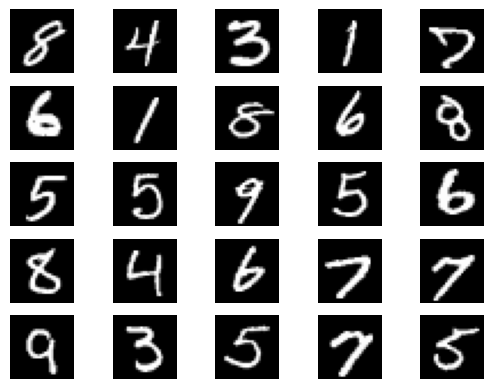

In [ ]:
for i, img_indx in enumerate(random_samples):
  plt.subplot(5,5, i+1)
  plt.imshow(train_data[img_indx][0][0], cmap="gray")
  plt.axis('off')

plt.show()

In [ ]:
class AutoEncoders(torch.nn.Module):
  def __init__(self, image_size=28):
    super().__init__()
    N = image_size ** 2 # 784 for MNIST data
    self.encoder = torch.nn.Sequential(
        torch.nn.Linear(N, 256),
        torch.nn.ReLU(),
        torch.nn.Linear(256, 128),
        torch.nn.ReLU(),
        torch.nn.Linear(128, 64),
        torch.nn.ReLU(),
        torch.nn.Linear(64, 10),
    )

    self.decoder = torch.nn.Sequential(
        torch.nn.Linear(10, 64),
        torch.nn.ReLU(),
        torch.nn.Linear(64, 128),
        torch.nn.ReLU(),
        torch.nn.Linear(128, 256),
        torch.nn.ReLU(),
        torch.nn.Linear(256, N),
        torch.nn.Sigmoid()
    )

  def forward(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded


In [ ]:
model = AutoEncoders()


In [ ]:
model.to('cuda')

AutoEncoders(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): ReLU()
    (6): Linear(in_features=64, out_features=10, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=10, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=256, bias=True)
    (5): ReLU()
    (6): Linear(in_features=256, out_features=784, bias=True)
    (7): Sigmoid()
  )
)

In [ ]:
!pip install torchview

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
 !pip install graphviz


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import graphviz

graphviz.set_jupyter_format('png')


'svg'

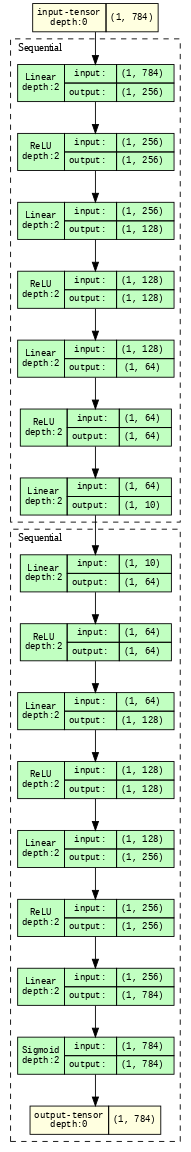

In [ ]:
from torchview import draw_graph

model_graph = draw_graph(model, input_size=(1,28*28), expand_nested=True)
model_graph.visual_graph


In [ ]:
from tqdm import tqdm


In [ ]:
model = AutoEncoders()
device = "cuda"
model.to(device)

optimization = torch.optim.Adam(model.parameters(), lr=0.0001)
loss_fn = torch.nn.MSELoss()

train_loss = []
epochs = 50

BATCH_SIZE = len(train_loader)

output = {}

for epoch in tqdm(range(epochs)):
  running_loss = 0.0
  model.to(device)
  for batch, (X, y) in enumerate(train_loader):
    # using _ for y variable, because we don't need it
    img, _ = X.to(device), y.to(device)
    img = img.reshape(-1, 28*28)
    out = model(img)
    loss = loss_fn(out, img)
    optimization.zero_grad()
    loss.backward()
    optimization.step()

    running_loss += loss.item()

  running_loss /= BATCH_SIZE
  train_loss.append(running_loss)
  print("\nEpoch : {}, Train Loss : {}".format(epoch, running_loss))

  output[epoch] = {'img' : img, 'out' : out}

  2%|▏         | 1/50 [00:17<14:08, 17.31s/it]


Epoch : 0, Train Loss : 0.9871322539315295


  4%|▍         | 2/50 [00:35<14:28, 18.09s/it]


Epoch : 1, Train Loss : 0.9219503335988344


  6%|▌         | 3/50 [00:52<13:43, 17.52s/it]


Epoch : 2, Train Loss : 0.9198444298208396


  8%|▊         | 4/50 [01:09<13:17, 17.34s/it]


Epoch : 3, Train Loss : 0.9195196828735408


 10%|█         | 5/50 [01:27<12:57, 17.28s/it]


Epoch : 4, Train Loss : 0.9191238764506667


 12%|█▏        | 6/50 [01:43<12:29, 17.02s/it]


Epoch : 5, Train Loss : 0.9161982273877557


 14%|█▍        | 7/50 [02:00<12:04, 16.86s/it]


Epoch : 6, Train Loss : 0.9121889504415395


 16%|█▌        | 8/50 [02:16<11:39, 16.66s/it]


Epoch : 7, Train Loss : 0.9090817319050527


 18%|█▊        | 9/50 [02:33<11:24, 16.69s/it]


Epoch : 8, Train Loss : 0.9062721183432191


 20%|██        | 10/50 [02:49<11:00, 16.51s/it]


Epoch : 9, Train Loss : 0.9022619125685458


 22%|██▏       | 11/50 [03:06<10:48, 16.63s/it]


Epoch : 10, Train Loss : 0.8990820080740873


 24%|██▍       | 12/50 [03:22<10:26, 16.49s/it]


Epoch : 11, Train Loss : 0.8963692077060244


 26%|██▌       | 13/50 [03:38<10:06, 16.39s/it]


Epoch : 12, Train Loss : 0.8940137149428508


 28%|██▊       | 14/50 [03:54<09:51, 16.44s/it]


Epoch : 13, Train Loss : 0.8913505674679396


 30%|███       | 15/50 [04:11<09:31, 16.33s/it]


Epoch : 14, Train Loss : 0.8893076536624924


 32%|███▏      | 16/50 [04:27<09:18, 16.43s/it]


Epoch : 15, Train Loss : 0.8877213505793736


 34%|███▍      | 17/50 [04:43<08:58, 16.33s/it]


Epoch : 16, Train Loss : 0.8862238558116498


 36%|███▌      | 18/50 [05:00<08:44, 16.38s/it]


Epoch : 17, Train Loss : 0.8848869995013483


 38%|███▊      | 19/50 [05:16<08:23, 16.25s/it]


Epoch : 18, Train Loss : 0.883631581690774


 40%|████      | 20/50 [05:32<08:06, 16.22s/it]


Epoch : 19, Train Loss : 0.8825023807188087


 42%|████▏     | 21/50 [05:49<07:54, 16.35s/it]


Epoch : 20, Train Loss : 0.8815174926318594


 44%|████▍     | 22/50 [06:04<07:34, 16.24s/it]


Epoch : 21, Train Loss : 0.8806907061193543


 46%|████▌     | 23/50 [06:21<07:20, 16.32s/it]


Epoch : 22, Train Loss : 0.879867393261334


 48%|████▊     | 24/50 [06:37<07:02, 16.23s/it]


Epoch : 23, Train Loss : 0.8788128334449045


 50%|█████     | 25/50 [06:54<06:49, 16.38s/it]


Epoch : 24, Train Loss : 0.8777519970941645


 52%|█████▏    | 26/50 [07:10<06:32, 16.35s/it]


Epoch : 25, Train Loss : 0.8769237665352283


 54%|█████▍    | 27/50 [07:26<06:13, 16.26s/it]


Epoch : 26, Train Loss : 0.8762278596856701


 56%|█████▌    | 28/50 [07:42<05:58, 16.29s/it]


Epoch : 27, Train Loss : 0.8756066096235694


 58%|█████▊    | 29/50 [07:59<05:40, 16.23s/it]


Epoch : 28, Train Loss : 0.875026366413275


 60%|██████    | 30/50 [08:15<05:25, 16.29s/it]


Epoch : 29, Train Loss : 0.8744865631116733


 62%|██████▏   | 31/50 [08:31<05:08, 16.23s/it]


Epoch : 30, Train Loss : 0.8739724498567805


 64%|██████▍   | 32/50 [08:47<04:51, 16.18s/it]


Epoch : 31, Train Loss : 0.8734856669201272


 66%|██████▌   | 33/50 [09:04<04:36, 16.26s/it]


Epoch : 32, Train Loss : 0.8730247560848814


 68%|██████▊   | 34/50 [09:20<04:18, 16.16s/it]


Epoch : 33, Train Loss : 0.8725922021276152


 70%|███████   | 35/50 [09:36<04:04, 16.29s/it]


Epoch : 34, Train Loss : 0.8721880715157686


 72%|███████▏  | 36/50 [09:52<03:48, 16.30s/it]


Epoch : 35, Train Loss : 0.8718092437746174


 74%|███████▍  | 37/50 [10:09<03:32, 16.35s/it]


Epoch : 36, Train Loss : 0.8714532661539659


 76%|███████▌  | 38/50 [10:25<03:16, 16.39s/it]


Epoch : 37, Train Loss : 0.8711122606736003


 78%|███████▊  | 39/50 [10:42<02:59, 16.35s/it]


Epoch : 38, Train Loss : 0.8707669679162853


 80%|████████  | 40/50 [10:58<02:45, 16.50s/it]


Epoch : 39, Train Loss : 0.8704114731059653


 82%|████████▏ | 41/50 [11:15<02:29, 16.60s/it]


Epoch : 40, Train Loss : 0.8700356913655043


 84%|████████▍ | 42/50 [11:32<02:13, 16.63s/it]


Epoch : 41, Train Loss : 0.8696130027394813


 86%|████████▌ | 43/50 [11:48<01:54, 16.42s/it]


Epoch : 42, Train Loss : 0.8691712073934104


 88%|████████▊ | 44/50 [12:05<01:38, 16.48s/it]


Epoch : 43, Train Loss : 0.8687653307721559


 90%|█████████ | 45/50 [12:21<01:22, 16.57s/it]


Epoch : 44, Train Loss : 0.8683960050153834


 92%|█████████▏| 46/50 [12:38<01:06, 16.61s/it]


Epoch : 45, Train Loss : 0.8680647223361774


 94%|█████████▍| 47/50 [12:55<00:50, 16.74s/it]


Epoch : 46, Train Loss : 0.8677694623404221


 96%|█████████▌| 48/50 [13:11<00:33, 16.59s/it]


Epoch : 47, Train Loss : 0.8674956696119898


 98%|█████████▊| 49/50 [13:28<00:16, 16.64s/it]


Epoch : 48, Train Loss : 0.8672393171517834


100%|██████████| 50/50 [13:44<00:00, 16.50s/it]


Epoch : 49, Train Loss : 0.8669976421764919


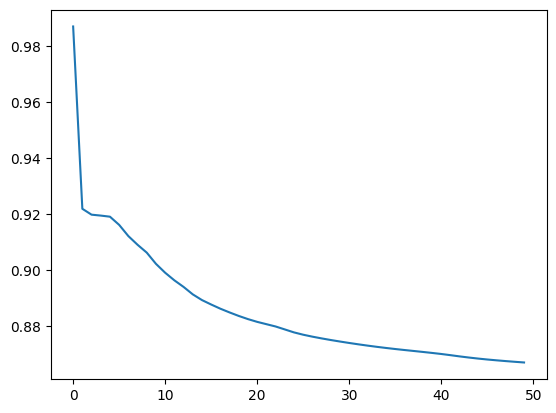

In [ ]:
plt.plot(train_loss)
plt.show()


In [ ]:
# output[0]

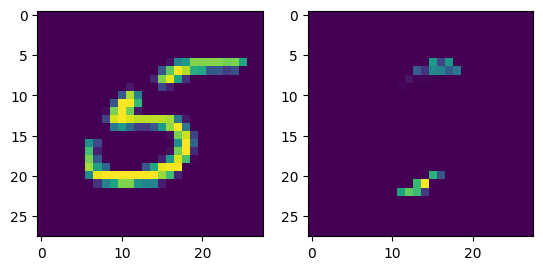

In [ ]:
plt.subplot(1,2,1)
plt.imshow(output[0]['img'][0].cpu().reshape(28, 28))
plt.subplot(1,2,2)
plt.imshow(output[0]['out'].cpu().detach().numpy()[0].reshape(28,28))
plt.show()

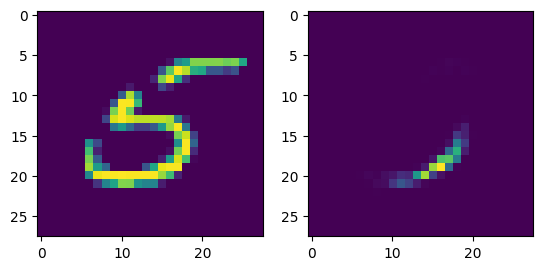

In [ ]:
plt.subplot(1,2,1)
plt.imshow(output[9]['img'][0].cpu().reshape(28, 28))
plt.subplot(1,2,2)
plt.imshow(output[9]['out'].cpu().detach().numpy()[0].reshape(28,28))
plt.show()

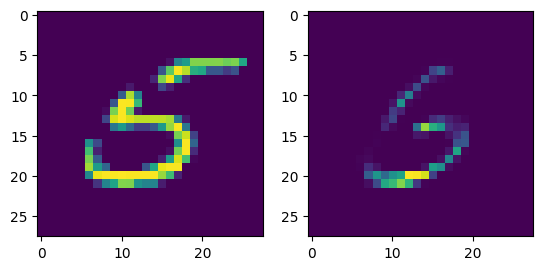

In [ ]:
plt.subplot(1,2,1)
plt.imshow(output[49]['img'][0].cpu().reshape(28, 28))
plt.subplot(1,2,2)
plt.imshow(output[49]['out'].cpu().detach().numpy()[0].reshape(28,28))
plt.show()